## Libraries

In [29]:
import pandas as pd
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [30]:
# Read the file resulsSPECIFICITY.csv into a pandas dataframe
df = pd.read_csv('resultsSPECIFICITY.csv', delimiter=';')

# Group the dataframe by OldFM, NewFM, Generator, and for the other columns compute the average
df = df.groupby(['OldFM', 'NewFM', 'Generator']).mean()
# Reset the index
df = df.reset_index()

## Wilcoxon-Signed Rank Tests

In [31]:
def test(datax, datay, label):
    test_times = stats.wilcoxon(datax, datay, alternative='two-sided', method='approx')
    print ("*** Test on " + label + " ***")
    print (test_times)
    print (datax.mean())
    print (datay.mean())
    print ("Effect size: " + str(test_times.zstatistic / math.sqrt(len(datax) + len(datay))))

### Fault detection

In [32]:
faultDetectionACTS = df.loc[df['Generator'] == 'ACTS', 'FaultDetection'].values
faultDetectionSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'FaultDetection'].values
faultDetectionBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'FaultDetection'].values
faultDetectionMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'FaultDetection'].values
# Test the difference between the two generators
test(faultDetectionACTS, faultDetectionSPEC, "ACTS vs SPECIFICITY")
test(faultDetectionACTS, faultDetectionBDD, "ACTS vs BDD")
test(faultDetectionACTS, faultDetectionMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(faultDetectionBDD, faultDetectionSPEC, "BDD vs SPECIFICITY")
test(faultDetectionBDD, faultDetectionMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")


*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=3848.5, pvalue=0.10246140329616256)
0.7405379397195122
0.7402268076219513
Effect size: -0.04032495234137963
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=3875.0, pvalue=0.14921608270246023)
0.7405379397195122
0.7401843351585365
Effect size: -0.03561520682964403
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=2876.5, pvalue=0.7133477259770707)
0.7405379397195122
0.7405356341463414
Effect size: -0.009071400601199188
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=3943.0, pvalue=0.8883078415124714)
0.7401843351585365
0.7402268076219513
Effect size: -0.0034680597013614037
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=4187.0, pvalue=0.2450547900899287)
0.7401843351585365
0.7405356341463414
Effect size: -0.028704531039066384
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=3930.5, pvalue=0.23692100009906003)
0.7402268076219513
0.7405356341463414
Effect 

### Specificity

In [33]:
specificityACTS = df.loc[df['Generator'] == 'ACTS', 'Specificity'].values
specificitySPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Specificity'].values
specificityBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Specificity'].values
specificityMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Specificity'].values
# Test the difference between the two generators
test(specificityACTS, specificitySPEC, "ACTS vs SPECIFICITY")
test(specificityACTS, specificityBDD, "ACTS vs BDD")
test(specificityACTS, specificityMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(specificityBDD, specificitySPEC, "BDD vs SPECIFICITY")
test(specificityBDD, specificityMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(specificitySPEC, specificityMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=7.230789874814972e-39)
0.48209446409756096
0.5316380367317074
Effect size: -0.3220037279520086
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=3755.0, pvalue=3.061726509309776e-13)
0.48209446409756096
0.49917493103048777
Effect size: -0.1800545615521312
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=24595.0, pvalue=0.015384547941909623)
0.48209446409756096
0.49128920109756097
Effect size: -0.059836604329531966
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=164.0, pvalue=8.10561030804106e-31)
0.49917493103048777
0.5316380367317074
Effect size: -0.28500840867228744
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=23282.0, pvalue=0.007866334466988081)
0.49917493103048777
0.49128920109756097
Effect size: -0.06562855124761888
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=12950.0, pvalue=3.7721432574283775e-14)
0.5316380367317074
0.491289201

### Time

In [34]:
timeACTS = df.loc[df['Generator'] == 'ACTS', 'Time'].values
timeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Time'].values
timeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Time'].values
timeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Time'].values
# Test the difference between the two generators
test(timeACTS, timeSPEC, "ACTS vs SPECIFICITY")
test(timeACTS, timeBDD, "ACTS vs BDD")
test(timeACTS, timeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(timeBDD, timeSPEC, "BDD vs SPECIFICITY")
test(timeBDD, timeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(timeSPEC, timeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=0.0, pvalue=7.562125703224379e-136)
168.48536585365855
41.00731707317073
Effect size: -0.6125614859121863
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=4.0, pvalue=7.673505686322676e-136)
168.48536585365855
39.51341463414634
Effect size: -0.6125469549914911
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=100.5, pvalue=1.092480063336082e-135)
168.48536585365855
38.667073170731705
Effect size: -0.6121957709479099
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=127955.0, pvalue=0.004174372730480683)
39.51341463414634
41.00731707317073
Effect size: -0.07073810995913425
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=122079.0, pvalue=0.0028044245050046135)
39.51341463414634
38.667073170731705
Effect size: -0.07379327293989571
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=110613.0, pvalue=3.5359108844271533e-07)
41.00731707317073
38.667073170731705
Eff

### Size

In [35]:
sizeACTS = df.loc[df['Generator'] == 'ACTS', 'Size'].values
sizeSPEC = df.loc[df['Generator'] == 'SPECIFICITY_FMREDUCED', 'Size'].values
sizeBDD = df.loc[df['Generator'] == 'BDD_FMREDUCED', 'Size'].values
sizeMUTTESTGENERATOR = df.loc[df['Generator'] == 'MUTTESTGENERATOR', 'Size'].values
# Test the difference between the two generators
test(sizeACTS, sizeSPEC, "ACTS vs SPECIFICITY")
test(sizeACTS, sizeBDD, "ACTS vs BDD")
test(sizeACTS, sizeMUTTESTGENERATOR, "ACTS vs MUTTESTGENERATOR")
test(sizeBDD, sizeSPEC, "BDD vs SPECIFICITY")
test(sizeBDD, sizeMUTTESTGENERATOR, "BDD vs MUTTESTGENERATOR")
test(sizeSPEC, sizeMUTTESTGENERATOR, "SPECIFICITY vs MUTTESTGENERATOR")

*** Test on ACTS vs SPECIFICITY ***
WilcoxonResult(statistic=27084.0, pvalue=3.916352778837877e-07)
8.475609756097562
8.68658536585366
Effect size: -0.12526829300613576
*** Test on ACTS vs BDD ***
WilcoxonResult(statistic=31379.5, pvalue=0.020713377266814933)
8.475609756097562
8.534146341463414
Effect size: -0.057119624493544345
*** Test on ACTS vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=70175.0, pvalue=8.710268717677615e-25)
8.475609756097562
7.097560975609756
Effect size: -0.25383623534232036
*** Test on BDD vs SPECIFICITY ***
WilcoxonResult(statistic=9657.0, pvalue=4.366412551748101e-08)
8.534146341463414
8.68658536585366
Effect size: -0.13520419573726014
*** Test on BDD vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=77556.5, pvalue=4.567578622023178e-19)
8.534146341463414
7.097560975609756
Effect size: -0.22032016685241337
*** Test on SPECIFICITY vs MUTTESTGENERATOR ***
WilcoxonResult(statistic=74501.0, pvalue=2.231401374240459e-20)
8.68658536585366
7.097560975609756
Effect

## Box-Plots

In [36]:
def box_plot(y1, y2, y3, y4, ylabel, xscale = 'log', plot_correspondence = False, scale = 1, showfliers = True):
    plt.figure(figsize=(4,2.5))
    sns.boxplot(data=[y1/scale, y2/scale, y3/scale, y4/scale], orient='h', showfliers = showfliers, showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"white"})
    plt.xscale(xscale)
    plt.yticks(range(4), labels=['ACTS', 'BDD', 'SPECGEN', 'MUTTESTGEN'])
    plt.xlabel(ylabel)
    plt.show()

### Fault detection

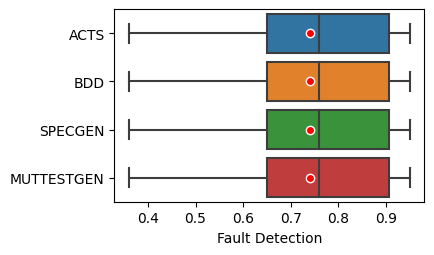

In [37]:
box_plot(faultDetectionACTS, faultDetectionBDD, faultDetectionSPEC, faultDetectionMUTTESTGENERATOR, 'Fault Detection', xscale = 'linear', scale = 1, showfliers = False)

### Specificity

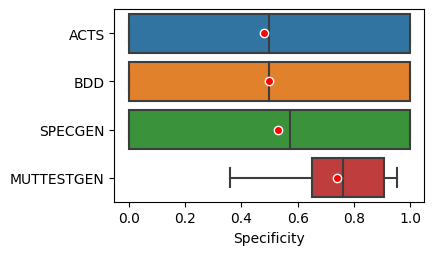

In [38]:
box_plot(specificityACTS, specificityBDD, specificitySPEC, faultDetectionMUTTESTGENERATOR, 'Specificity', xscale = 'linear', scale = 1, showfliers = False)

### Time

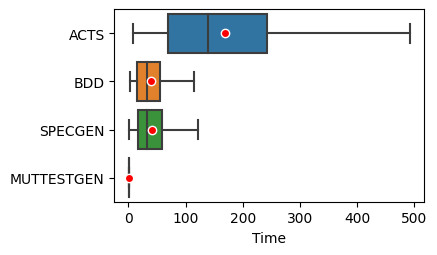

In [39]:
box_plot(timeACTS, timeBDD, timeSPEC, faultDetectionMUTTESTGENERATOR, 'Time', xscale = 'linear', scale = 1, showfliers = False)

### Size

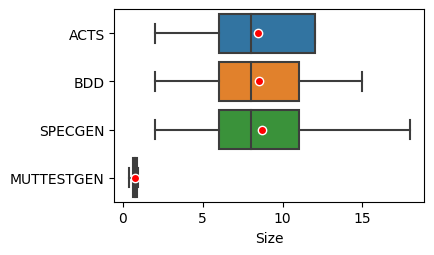

In [40]:
box_plot(sizeACTS, sizeBDD, sizeSPEC, faultDetectionMUTTESTGENERATOR, 'Size', xscale = 'linear', scale = 1, showfliers = False)